# Tools

In [1]:
import h5py, numpy as np, tqdm, os, glob
from matplotlib import pyplot as plt

In [2]:
# %matplotlib widget
%matplotlib inline

# Data

In [3]:
ls "/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/"

 boa2021n000457.hdf   boa2021n000470.hdf   boa2021n000485.hdf
 boa2021n000458.hdf   boa2021n000472.hdf   boa2021n000487.hdf
 boa2021n000460.hdf   boa2021n000474.hdf   boa2021n000489.hdf
 boa2021n000462.hdf   boa2021n000477.hdf   boa2021n000491.hdf
 boa2021n000464.hdf   boa2021n000479.hdf   boa2021n000494.hdf
 boa2021n000466.hdf   boa2021n000481.hdf  '~$cument.docx'
 boa2021n000468.hdf   boa2021n000483.hdf   Document.docx


In [4]:
obf = h5py.File('/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000457.hdf')
sample1f = h5py.File('/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000458.hdf')

In [5]:
obdata = obf['entry']['data']['data']
sample1data = sample1f['entry']['data']['data']
obdata.shape

(11, 1024, 1024)

# Raw data

In [ ]:
cb1.set

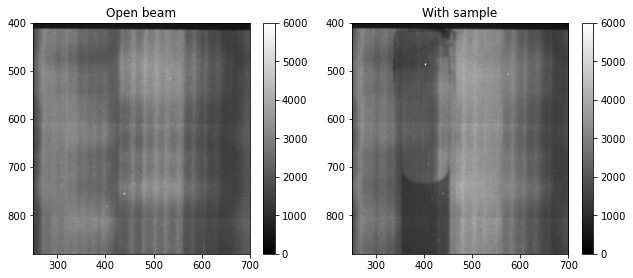

In [149]:
fig, (leftax, rightax) = plt.subplots(1,2, figsize=(9,3.8))
im1 = leftax.imshow(obdata[2], vmin=0, vmax=6000, cmap='gray')
leftax.set_xlim(250, 700)
leftax.set_ylim(880, 400)
leftax.set_title("Open beam")
cb1 = fig.colorbar(im1, ax=leftax)
im2 = rightax.imshow(sample1data[6], vmin=0, vmax=6000, cmap='gray')
rightax.set_xlim(250, 700)
rightax.set_ylim(880, 400)
rightax.set_title('With sample')
import matplotlib.patches as patches
rect = patches.Rectangle((470, 761), 62, 101, linewidth=1, edgecolor='r', facecolor='none')
# rightax.add_patch(rect)
fig.colorbar(im2, ax=rightax)
plt.tight_layout()

# Waves

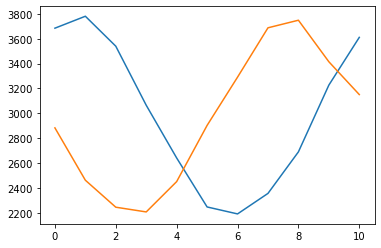

In [7]:
plt.figure()
plt.plot(obdata[:, 500, 500])
plt.plot(sample1data[:, 500, 500])

# a0, a1

In [8]:
ob_a0 = np.mean(obdata, axis=0)
ob_a1 = (np.max(obdata, axis=0)-np.min(obdata, axis=0))/2

In [9]:
sample1_a0 = np.mean(sample1data, axis=0)
sample1_a1 = (np.max(sample1data, axis=0)-np.min(sample1data, axis=0))/2

# TI

In [10]:
TI = sample1_a0/ob_a0

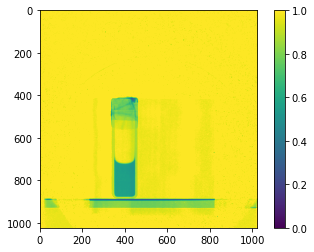

In [11]:
plt.figure()
plt.imshow(TI)
plt.clim(0,1)
plt.colorbar()

# Visibility

In [12]:
sample1_vs = sample1_a1/sample1_a0

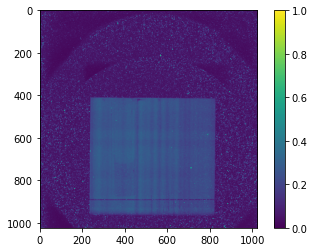

In [13]:
plt.figure()
plt.imshow(sample1_vs)
plt.clim(0,1)
plt.colorbar()

In [14]:
ob_vs = ob_a1/ob_a0

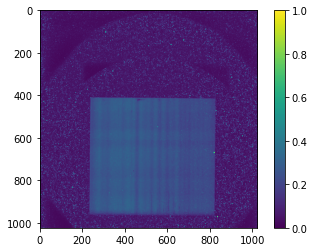

In [15]:
plt.figure()
plt.imshow(ob_vs)
plt.clim(0,1)
plt.colorbar()

# DFI

In [16]:
sample1_DFI = sample1_vs/ob_vs

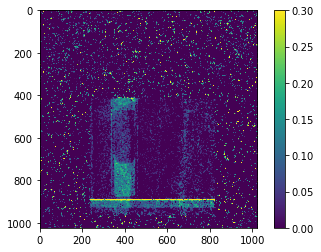

In [17]:
plt.figure()
plt.imshow(1-sample1_DFI)
plt.clim(0,0.3)
plt.colorbar()

# Phase (crude)

In [18]:
sample1_phase_crude = np.argmax(sample1data, axis=0)/11.0*np.pi*2
ob_phase_crude = np.argmax(obdata, axis=0)/11.0*np.pi*2

In [19]:
sample1_phase_diff = sample1_phase_crude - ob_phase_crude

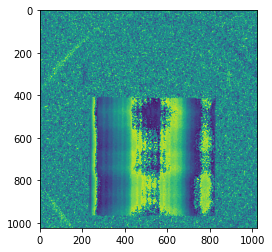

In [80]:
plt.figure()
plt.imshow(ob_phase_crude)

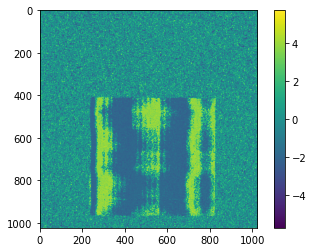

In [20]:
plt.figure()
plt.imshow(sample1_phase_diff)
#plt.clim(0,0.3)
plt.colorbar()

# Phase

## Explore

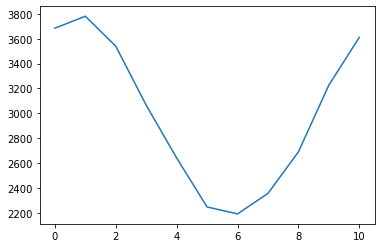

In [21]:
plt.figure()
plt.plot(obdata[:, 500, 500])

In [61]:
y0 = obdata[:, 500, 500].copy()

In [62]:
y0= y0/np.max(y0)

In [63]:
i = np.arange(11.)

In [64]:
phi = i/11*np.pi*2

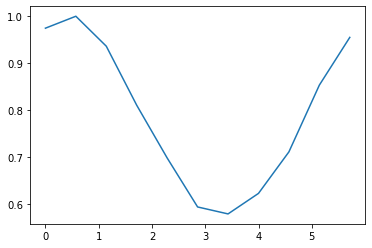

In [65]:
plt.figure()
plt.plot(phi, y0)

In [66]:
o, a_c, a_s = 0., 0., 0.

In [67]:
y = o + a_c*np.cos(phi) + a_s*np.sin(phi)

In [68]:
o1 = o + np.mean(y0-y)
a_s1 = a_s + np.mean( (y0-y)*np.sin(phi) )*2
a_c1 = a_c + np.mean( (y0-y)*np.cos(phi) )*2

In [70]:
o1, a_s1, a_c1, a_s1/a_c1

(0.7942583732057416,
 0.047076167733060004,
 0.2099044845751904,
 0.22427423515192565)

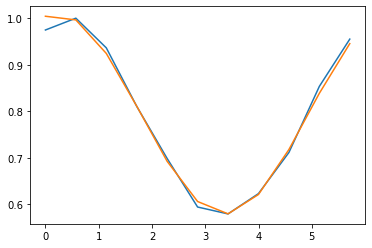

In [71]:
plt.figure()
plt.plot(phi, y0)
# plt.plot(phi, o+a_s*np.sin(phi)+a_c*np.cos(phi))
plt.plot(phi, o1+a_s1*np.sin(phi)+a_c1*np.cos(phi))

## Do it for all

In [43]:
obdata.shape

(11, 1024, 1024)

In [89]:
def calcPhase(data, niter=5):
    shape = data.shape[1:]
    o = np.zeros(shape)
    a_c = np.zeros(shape)
    a_s = np.zeros(shape)
    cp = np.cos(phi)
    sp = np.sin(phi)
    for i in range(niter):
        y = np.multiply.outer(cp, a_c) + np.multiply.outer(sp, a_s) + o[np.newaxis, :]
        o1 = o + np.mean((data-y), axis=0)
        a_s1 = np.mean((data-y)*sp[:, np.newaxis, np.newaxis], axis=0)*2 + a_s
        a_c1 = np.mean((data-y)*cp[:, np.newaxis, np.newaxis], axis=0)*2 + a_c
        o, a_s, a_c = o1, a_s1, a_c1
    return o, a_s, a_c

### One iteration

In [98]:
o1, a_s1, a_c1 = calcPhase(obdata, niter=1)
print(o1[500, 500], a_s1[500, 500], a_c1[500, 500], a_s1[500, 500]/a_c1[500, 500])

3003.090909090909 177.99499019870038 793.6488561787952 0.2242742351519262


In [99]:
ob_phase = np.arctan2(-a_c1, a_s1)

In [100]:
o1, a_s1, a_c1 = calcPhase(sample1data, niter=1)
sample1_phase = np.arctan2(-a_c1, a_s1)

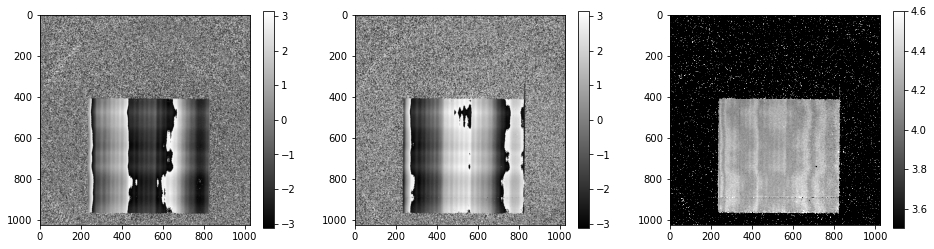

In [159]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.imshow(ob_phase, cmap='gray')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(sample1_phase, cmap='gray')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow((sample1_phase-ob_phase)%(2*np.pi), cmap='gray')
plt.clim(3.5, 4.6)
plt.colorbar()

### Checking

In [116]:
# ob_phase[450:900, 380]
# ob_phase[450:900, 500]

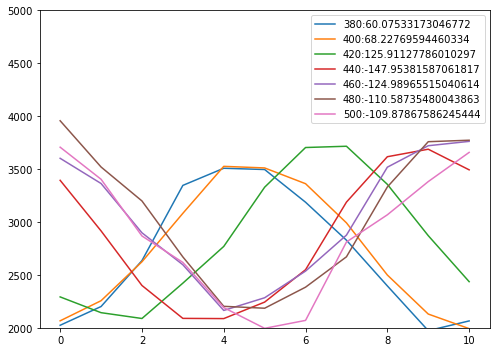

In [124]:
plt.figure(figsize=(7,5))
for i in range(380, 501, 20):
    p = ob_phase[700, i]
    plt.plot(obdata[:, 700, i], label=f"{i}:{np.rad2deg(p)}")
plt.legend()
plt.ylim(2000, 5000)
plt.tight_layout()

# Loop over images

In [163]:
files = glob.glob("/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/*.hdf")

In [207]:
sample_files = sorted(files)[1:]
#sample_files

In [177]:
phasediffs = {}
for f in sample_files:
    print(f)
    sample1data = h5py.File(f)['entry']['data']['data']
    k = os.path.basename(f)
    k = k.split('000')[-1].rstrip('.hdf')
    print(k)
    try:
        o1, a_s1, a_c1 = calcPhase(sample1data, niter=1)
    except:
        print(f"{f}: failed")
    sample1_phase = np.arctan2(-a_c1, a_s1)
    phasediffs[k]=(sample1_phase-ob_phase)%(2*np.pi)

/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000458.hdf
458
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000460.hdf
460
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000462.hdf
462
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000464.hdf
464
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000466.hdf
466
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000468.hdf
468
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000470.hdf
470
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000472.hdf
472
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000474.hdf
474
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000477.hdf
477
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000479.hdf
479
/data/97n/sts/cupid/O

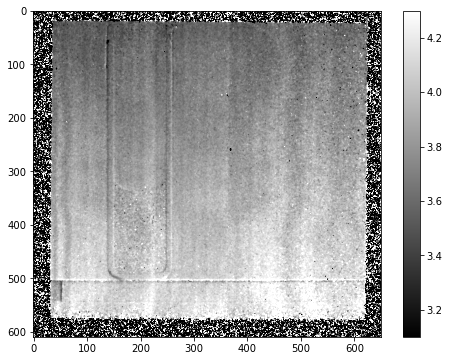

In [210]:
plt.figure(figsize=(8,6.))
plt.imshow(phasediffs['479'][390:1000, 200:850], cmap='gray')
plt.colorbar()
plt.clim(3.1, 4.3) #479
# plt.clim(4.5, 5.5) #474

# Use the fast cos wave fitting method to obtain signals

In [5]:
def calcPhase(data, niter=5):
    shape = data.shape[1:]
    o = np.zeros(shape)
    a_c = np.zeros(shape)
    a_s = np.zeros(shape)
    cp = np.cos(phi)
    sp = np.sin(phi)
    for i in range(niter):
        y = np.multiply.outer(cp, a_c) + np.multiply.outer(sp, a_s) + o[np.newaxis, :]
        o1 = o + np.mean((data-y), axis=0)
        a_s1 = np.mean((data-y)*sp[:, np.newaxis, np.newaxis], axis=0)*2 + a_s
        a_c1 = np.mean((data-y)*cp[:, np.newaxis, np.newaxis], axis=0)*2 + a_c
        o, a_s, a_c = o1, a_s1, a_c1
    return o, a_s, a_c

## Explore

In [6]:
obf = h5py.File('/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000457.hdf')
sample1f = h5py.File('/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000479.hdf')

In [7]:
obdata = obf['entry']['data']['data']
sample1data = sample1f['entry']['data']['data']
obdata.shape

(11, 1024, 1024)

In [8]:
i = np.arange(11.)
phi = i/11*np.pi*2

### Visibility and phase change

In [9]:
o1, a_s1, a_c1 = calcPhase(obdata, niter=1)
print(o1[500, 500], a_s1[500, 500], a_c1[500, 500], a_s1[500, 500]/a_c1[500, 500])
ob_phase = np.arctan2(-a_c1, a_s1)
ob_vis = np.sqrt(a_c1*a_c1+a_s1*a_s1)/o1

3003.090909090909 177.99499019870038 793.6488561787952 0.2242742351519262


In [10]:
o1, a_s1, a_c1 = calcPhase(sample1data, niter=1)
a1 =  np.sqrt(a_c1*a_c1+a_s1*a_s1)
sample1_phase = np.arctan2(-a_c1, a_s1)
sample1_vis = a1/o1

### Plot phase

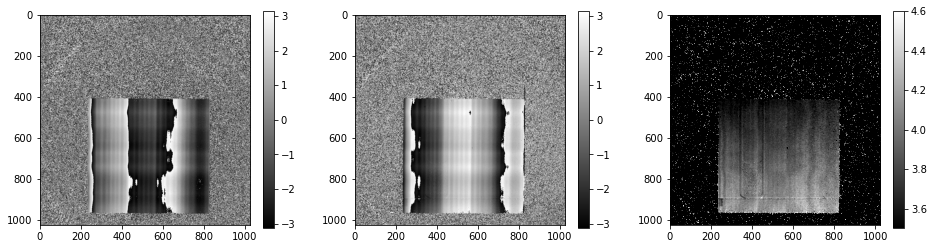

In [11]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.imshow(ob_phase, cmap='gray')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(sample1_phase, cmap='gray')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow((sample1_phase-ob_phase)%(2*np.pi), cmap='gray')
plt.clim(3.5, 4.6)
plt.colorbar()

### Plot Dark field

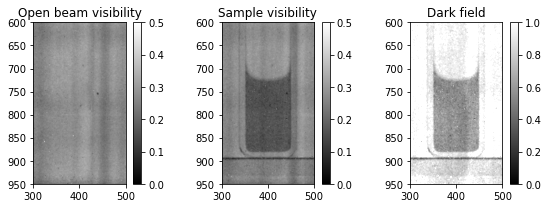

In [12]:
plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
plt.title('Open beam visibility')
plt.imshow(ob_vis, cmap='gray')
plt.colorbar()
plt.clim(0, .5)
plt.xlim(300, 500); plt.ylim(950, 600)
plt.subplot(1,3,2)
plt.title('Sample visibility')
plt.imshow(sample1_vis, cmap='gray')
plt.colorbar()
plt.xlim(300, 500); plt.ylim(950, 600)
plt.clim(0, .5)
plt.subplot(1,3,3)
plt.title('Dark field')
plt.imshow(sample1_vis/ob_vis, cmap='gray')
plt.xlim(300, 500); plt.ylim(950, 600)
plt.clim(0, 1)
plt.colorbar()
plt.tight_layout()

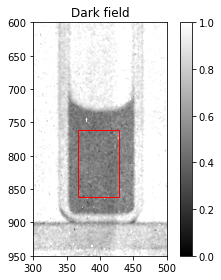

In [70]:
fig, ax = plt.subplots(figsize=(4,4))
plt.title('Dark field')
plt.imshow(sample1_vis/ob_vis, cmap='gray')

import matplotlib.patches as patches
rect = patches.Rectangle((367, 761), 62, 101, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.xlim(300, 500); plt.ylim(950, 600)
plt.clim(0, 1)
plt.colorbar()
plt.tight_layout()

# Compute all

In [13]:
files = glob.glob("/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/*.hdf")

In [14]:
sample_files = sorted(files)[1:]
#sample_files

In [15]:
sample_vis_images = {}
for f in sample_files:
    print(f)
    sample1data = h5py.File(f)['entry']['data']['data']
    k = os.path.basename(f)
    k = k.split('000')[-1].rstrip('.hdf')
    print(k)
    try:
        o1, a_s1, a_c1 = calcPhase(sample1data, niter=1)
    except:
        print(f"{f}: failed")
        sample_vis_images[k] = None
        continue
    # sample1_phase = np.arctan2(-a_c1, a_s1)
    a1 =  np.sqrt(a_c1*a_c1+a_s1*a_s1)
    sample1_phase = np.arctan2(-a_c1, a_s1)
    sample1_vis = a1/o1
    sample_vis_images[k]=sample1_vis

/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000458.hdf
458
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000460.hdf
460
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000462.hdf
462
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000464.hdf
464
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000466.hdf
466
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000468.hdf
468
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000470.hdf
470
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000472.hdf
472
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000474.hdf
474
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000477.hdf
477
/data/97n/sts/cupid/ORNL_PSI_nGI_collaboration/Polystyrene sample/boa2021n000479.hdf
479
/data/97n/sts/cupid/O

In [16]:
keys = sorted(list(sample_vis_images.keys()))
len(keys)

18

In [17]:
Ls = np.array([0., 5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120, 145])/10
Ls+= 0.1+0.7
Ls = Ls*1e-2
Ls*1e2

array([ 0.8,  1.3,  1.8,  2.3,  2.8,  3.3,  3.8,  4.3,  4.8,  5.8,  6.8,
        7.8,  8.8,  9.8, 10.8, 11.8, 12.8, 15.3])

In [44]:
wl = 2.8e-10
wl = 3.75e-10
p = 13e-6
p = 25e-6
xi = wl*Ls/p
xi*1e6

array([0.12 , 0.195, 0.27 , 0.345, 0.42 , 0.495, 0.57 , 0.645, 0.72 ,
       0.87 , 1.02 , 1.17 , 1.32 , 1.47 , 1.62 , 1.77 , 1.92 , 2.295])

In [121]:
# sl = slice(761,862), slice(367, 429)
# sl = slice(745, 870), slice(360, 440)
sl = slice(790, 830), slice(380, 416)
obv = np.mean(ob_vis[sl])

sv = []
for k in keys:
    im = sample_vis_images[k]
    if im is not None:
        sv.append(np.mean(im[sl]))
    else:
        sv.append(None)

x = []; y = []
for x1,y1 in zip(xi, sv):
    if y1 is None: continue
    x.append(x1)
    y.append(y1)
x = np.array(x)
y = np.array(y)

y/obv

array([0.83668324, 0.78240009, 0.77691275, 0.78737506, 0.76307874,
       0.71992808, 0.67959499, 0.64208984, 0.61498265, 0.58533422,
       0.56507424, 0.54387693, 0.52109039, 0.48973089, 0.49371846,
       0.48782054, 0.48725242])

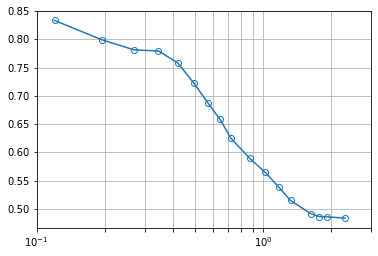

In [74]:
plt.figure()
plt.plot(x*1e6, y/obv, 'o-', mfc='none')
plt.xscale('log')
plt.xticks(list(np.arange(0.1, 1.01, 0.1)) + [2., 3.])
plt.grid()

In [46]:
lnVs_over_V0_divby_lambdasq = np.log(y/obv)/wl/wl

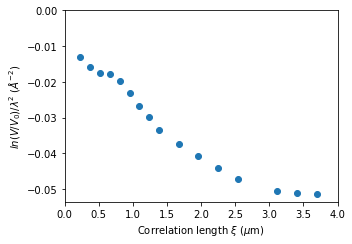

In [36]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, lnVs_over_V0_divby_lambdasq*1e-20, 'o')
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 4)
plt.ylim(None, 0)
plt.tight_layout()

In [37]:
t = 5e-3
r = 0.35e-6
phi = 0.117
delta_rho = 129

In [38]:
G_minus_one = lnVs_over_V0_divby_lambdasq/(3./2)/phi/delta_rho/delta_rho/r/t

hack

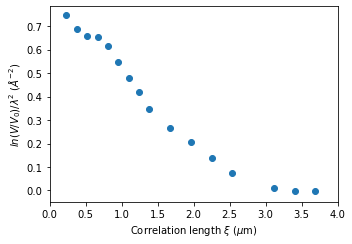

In [43]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, G_minus_one*1e-24+1, 'o')
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 4)
plt.tight_layout()

# Normalize by background near the sample

In [111]:
sample_bg_sl = slice(761,862), slice(470, 470+62)

sample_bg_v = []
for k in keys:
    im = sample_vis_images[k]
    if im is not None:
        sample_bg_v.append(np.mean(im[sample_bg_sl]))
    else:
        sample_bg_v.append(None)

sample_bg_y = []
for y1, sample_bg_y1 in zip(sv, sample_bg_v):
    if y1 is None: continue
    sample_bg_y.append(sample_bg_y1)
sample_bg_y = np.array(sample_bg_y)

sample_bg_y/obv

array([0.93570319, 0.88986294, 0.90441461, 0.9356621 , 0.93251243,
       0.9191665 , 0.8963578 , 0.89245812, 0.88944064, 0.92555459,
       0.94908171, 0.95689087, 0.95669024, 0.95294169, 0.95871364,
       0.95308513, 0.96017807])

Text(0, 0.5, '$V/V_0$')

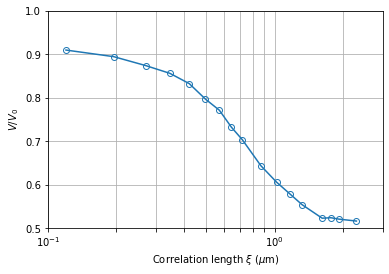

In [153]:
plt.figure()
plt.plot(x*1e6, (y/obv)/(sample_bg_y/obv), 'o-', mfc='none')
plt.xscale('log')
plt.xticks(list(np.arange(0.1, 1.01, 0.1)) + [2., 3.])
plt.grid()
plt.ylim(0.5, 1)
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
# plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.ylabel(r'$V/V_0$')

In [151]:
lnVs_over_V0_divby_lambdasq = np.log((y/obv)/(sample_bg_y/obv))/wl/wl

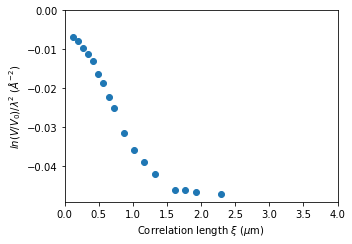

In [152]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, lnVs_over_V0_divby_lambdasq*1e-20, 'o')
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 4)
plt.ylim(None, 0)
plt.tight_layout()

Matteo corrected thickness to 2mm, and radius to 1micron

In [157]:
t = 2e-3
r = 1e-6
phi = 0.117
delta_rho = 129e12

In [158]:
G_minus_one = lnVs_over_V0_divby_lambdasq/(3./2)/phi/delta_rho/delta_rho/r/t

hack

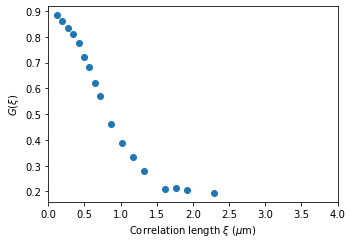

In [160]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, G_minus_one+1, 'o')
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$G(\xi)$')
plt.xlim(0, 4)
plt.tight_layout()

## The correlation function

In [169]:
def G(zeta):
    zeta2 = zeta*zeta
    return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))

In [173]:
zetas = np.linspace(1e-3, 3, 100)

/home/97n/miniconda3/envs/dev-mcvine-py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


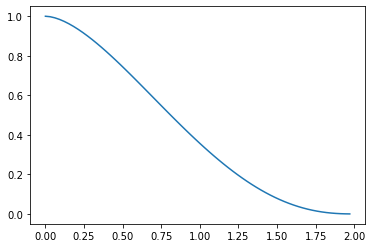

In [174]:
plt.figure()
plt.plot(zetas, G(zetas))

In [177]:
G(2.1)

/home/97n/miniconda3/envs/dev-mcvine-py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


nan

## Fitting

/home/97n/miniconda3/envs/dev-mcvine-py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


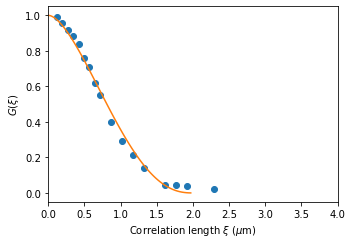

In [185]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, (G_minus_one+1)*1.4-0.25, 'o')
plt.plot(zetas*r*1e6, G(zetas))
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$G(\xi)$')
plt.xlim(0, 4)
plt.tight_layout()

/home/97n/miniconda3/envs/dev-mcvine-py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


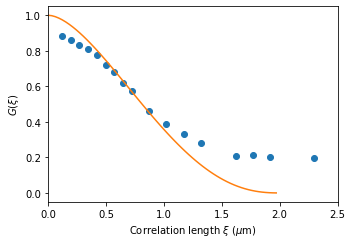

In [199]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, G_minus_one+1, 'o', label='Exp')
plt.plot(zetas*r*1e6, G(zetas), label='Model')
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$G(\xi)$')
plt.xlim(0, 2.5)
plt.tight_layout()

## Force G(0)=1

Text(0, 0.5, '$V/V_0$')

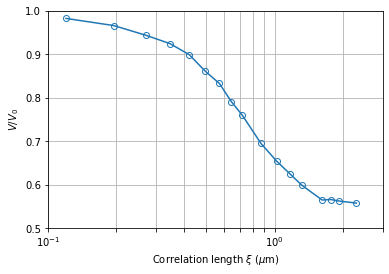

In [189]:
plt.figure()
plt.plot(x*1e6, (y/obv)/(sample_bg_y/obv)*1.08, 'o-', mfc='none')
plt.xscale('log')
plt.xticks(list(np.arange(0.1, 1.01, 0.1)) + [2., 3.])
plt.grid()
plt.ylim(0.5, 1)
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
# plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.ylabel(r'$V/V_0$')

In [190]:
lnVs_over_V0_divby_lambdasq_forceG0toOne = np.log((y/obv)/(sample_bg_y/obv)*1.08)/wl/wl

In [191]:
G_minus_one_forceG0toone = lnVs_over_V0_divby_lambdasq_forceG0toOne/(3./2)/phi/delta_rho/delta_rho/r/t

/home/97n/miniconda3/envs/dev-mcvine-py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


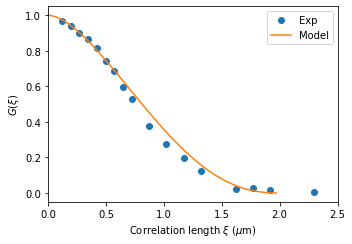

In [197]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, G_minus_one_forceG0toone*1.4+1, 'o', label='Exp')
plt.plot(zetas*r*1e6, G(zetas), label='Model')
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$G(\xi)$')
plt.xlim(0, 2.5)
plt.legend()
plt.tight_layout()